<a href="https://colab.research.google.com/github/fransarubbi/Data-Communication/blob/master/TP2_Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

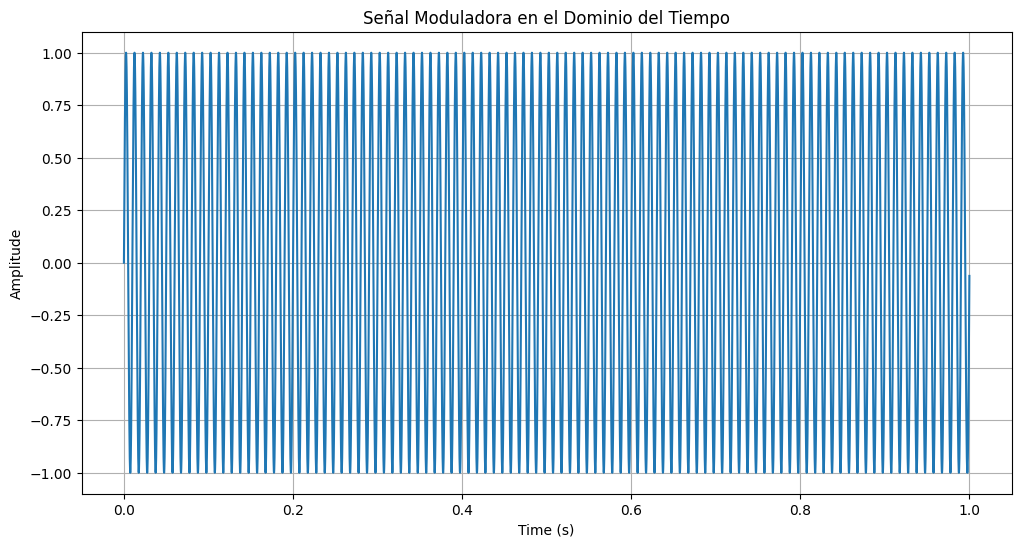

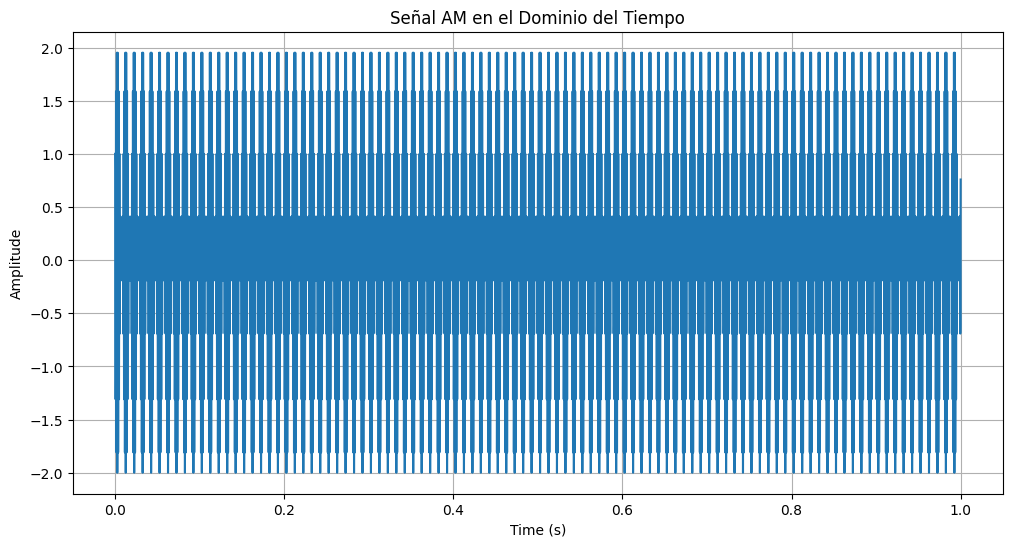

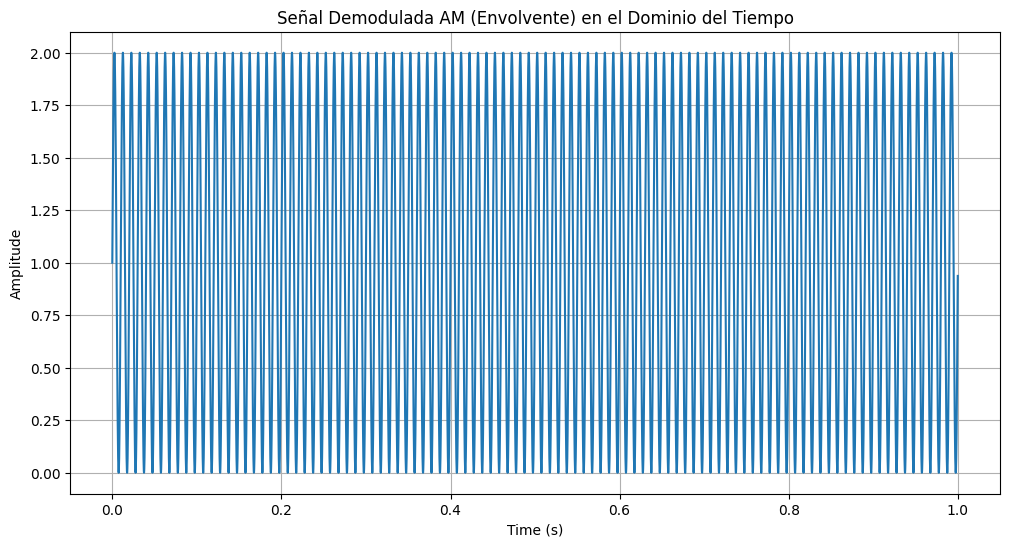

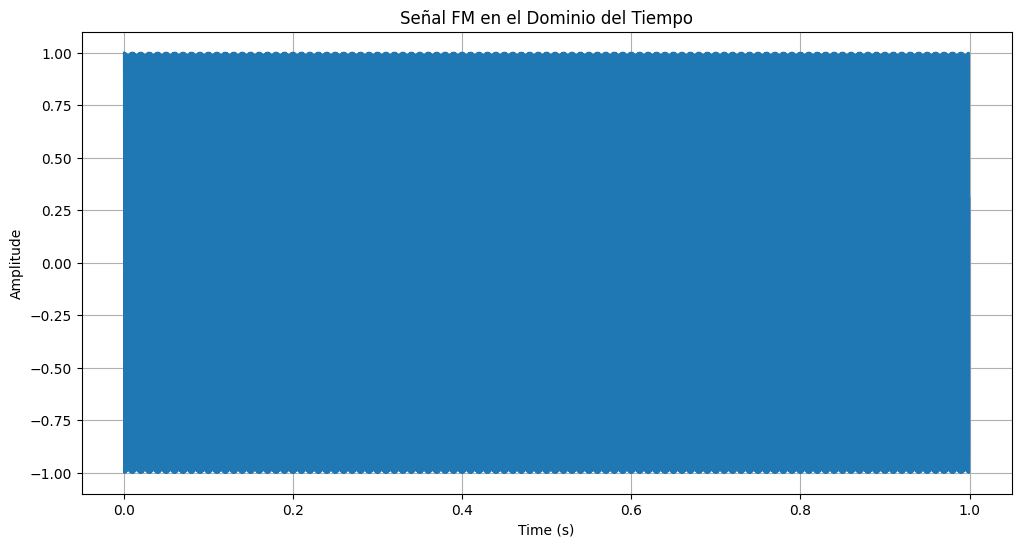

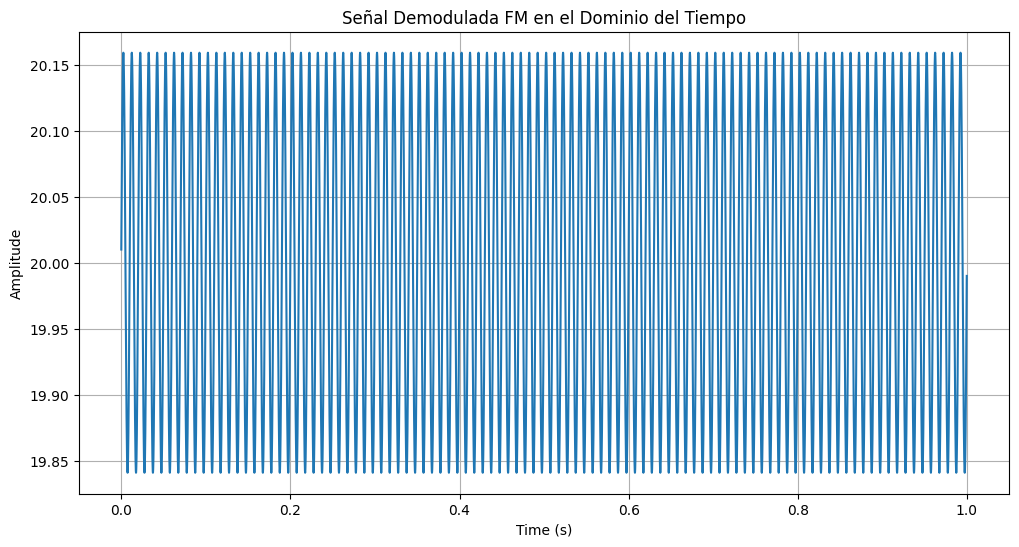

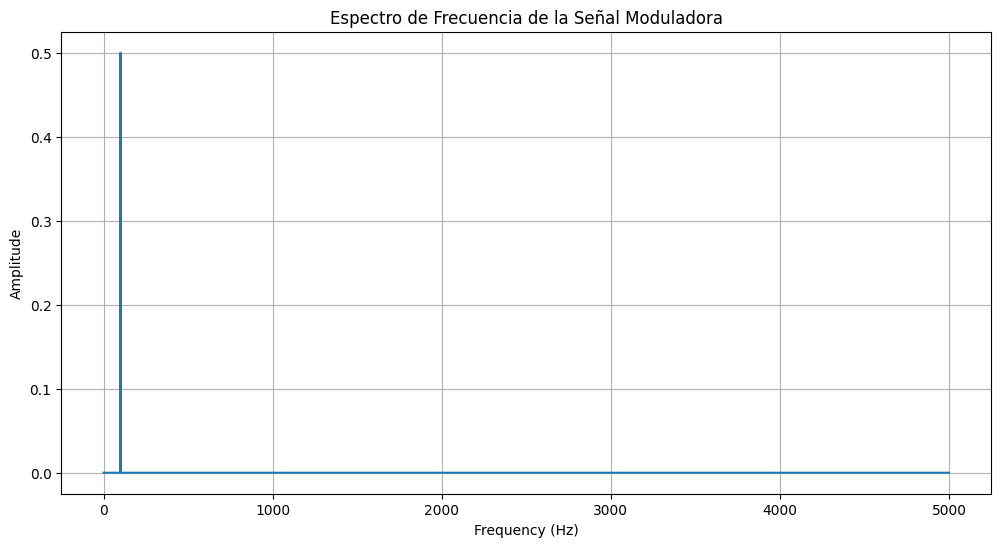

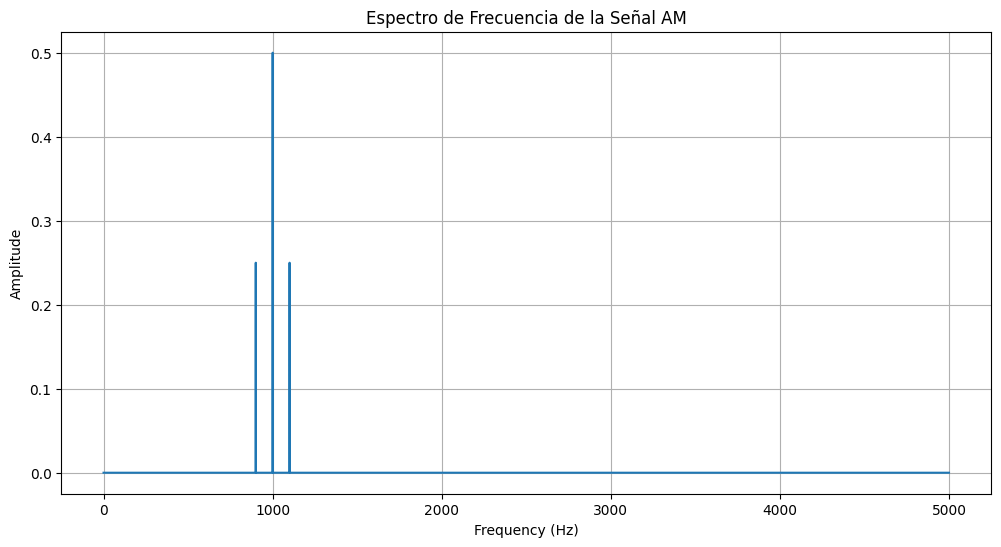

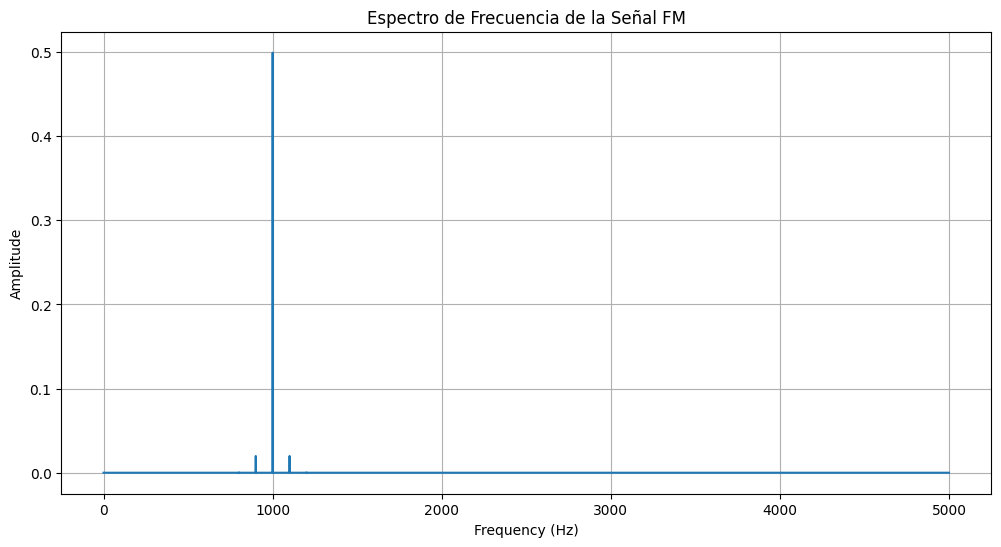

Energía de la señal moduladora (Tiempo): 0.50
Energía de la señal AM (Tiempo): 0.75
Energía de la señal FM (Tiempo): 0.50
Energía de la señal moduladora (Frecuencia): 0.50
Energía de la señal AM (Frecuencia): 0.75
Energía de la señal FM (Frecuencia): 0.50


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parámetros comunes
fs = 10000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # Vector de tiempo
f_carrier = 1000  # Frecuencia de la portadora
f_modulating = 100  # Frecuencia de la señal moduladora
A_modulating = 1  # Amplitud de la señal moduladora

# Señal moduladora
modulating_signal = A_modulating * np.sin(2 * np.pi * f_modulating * t)

# Modulación AM
modulated_signal_am = (1 + modulating_signal) * np.cos(2 * np.pi * f_carrier * t)

# Demodulación AM mediante detección de envolvente
analytic_signal = hilbert(modulated_signal_am)
envelope = np.abs(analytic_signal)

# Modulación FM
kf = 50  # Sensibilidad de frecuencia
modulated_signal_fm = np.cos(2 * np.pi * f_carrier * t + kf * np.cumsum(modulating_signal) / fs)

# Demodulación FM mediante transformada de Hilbert
analytic_signal_fm = hilbert(modulated_signal_fm)
instantaneous_phase = np.unwrap(np.angle(analytic_signal_fm))
demodulated_signal_fm = np.diff(instantaneous_phase) * fs / (2.0 * np.pi * kf)

# Función para mostrar señales
def plot_signals(t, signal, title, xlabel='Time (s)', ylabel='Amplitude'):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def plot_frequency_spectrum(signal, fs, title):
    N = len(signal)
    f = np.fft.fftfreq(N, 1/fs)
    spectrum = np.fft.fft(signal)
    spectrum = spectrum / N  # Normalizar la FFT
    plt.figure(figsize=(12, 6))
    plt.plot(f[:N // 2], np.abs(spectrum)[:N // 2])
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Función para calcular la energía de una señal en el dominio del tiempo
def calculate_energy_time(signal, fs):
    energy = np.sum(signal**2) / fs
    return energy

# Función para calcular la energía de una señal en el dominio de la frecuencia
def calculate_energy_frequency(signal, fs):
    N = len(signal)
    spectrum = np.fft.fft(signal)
    spectrum = spectrum / N  # Normalizar la FFT
    energy = np.sum(np.abs(spectrum)**2) * N / fs
    return energy

# Mostrar las señales moduladas y demoduladas en el dominio del tiempo
plot_signals(t, modulating_signal, 'Señal Moduladora en el Dominio del Tiempo')
plot_signals(t, modulated_signal_am, 'Señal AM en el Dominio del Tiempo')
plot_signals(t, envelope, 'Señal Demodulada AM (Envolvente) en el Dominio del Tiempo')

plot_signals(t[:-1], modulated_signal_fm[:-1], 'Señal FM en el Dominio del Tiempo')
plot_signals(t[:-1], demodulated_signal_fm, 'Señal Demodulada FM en el Dominio del Tiempo')

# Mostrar las señales moduladas en el dominio de la frecuencia
plot_frequency_spectrum(modulating_signal, fs, 'Espectro de Frecuencia de la Señal Moduladora')
plot_frequency_spectrum(modulated_signal_am, fs, 'Espectro de Frecuencia de la Señal AM')
plot_frequency_spectrum(modulated_signal_fm, fs, 'Espectro de Frecuencia de la Señal FM')

# Calcular la energía de las señales moduladas en el dominio del tiempo
energy_modulating_time = calculate_energy_time(modulating_signal, fs)
energy_am_time = calculate_energy_time(modulated_signal_am, fs)
energy_fm_time = calculate_energy_time(modulated_signal_fm, fs)

# Calcular la energía de las señales moduladas en el dominio de la frecuencia
energy_modulating_freq = calculate_energy_frequency(modulating_signal, fs)
energy_am_freq = calculate_energy_frequency(modulated_signal_am, fs)
energy_fm_freq = calculate_energy_frequency(modulated_signal_fm, fs)

print(f"Energía de la señal moduladora (Tiempo): {energy_modulating_time:.2f}")
print(f"Energía de la señal AM (Tiempo): {energy_am_time:.2f}")
print(f"Energía de la señal FM (Tiempo): {energy_fm_time:.2f}")

print(f"Energía de la señal moduladora (Frecuencia): {energy_modulating_freq:.2f}")
print(f"Energía de la señal AM (Frecuencia): {energy_am_freq:.2f}")
print(f"Energía de la señal FM (Frecuencia): {energy_fm_freq:.2f}")


**Notas Importantes:**

**Normalización de la FFT**

 La FFT debe ser normalizada dividiéndola por el número de muestras
𝑁
para que la escala de amplitud sea correcta.


Cálculo de Energía en Frecuencia: La energía en el dominio de la frecuencia se calcula sumando el cuadrado de la magnitud de la FFT normalizada y multiplicando por el número de muestras
𝑁, luego dividiendo por la frecuencia de muestreo
𝑓𝑠.


**Verificación:**


Escala Vertical: Al normalizar la FFT, la escala de amplitud en el dominio de la frecuencia debe corresponder correctamente a la amplitud de la señal en el dominio del tiempo.
Energía: La energía calculada en ambos dominios debe ser la misma, confirmando la exactitud de la implementación.

**Parte 1: Amplitud Modulada AM**

Simule una señal AM con una frecuencia portadora de 1 kHz y una señal moduladora de 100 Hz.

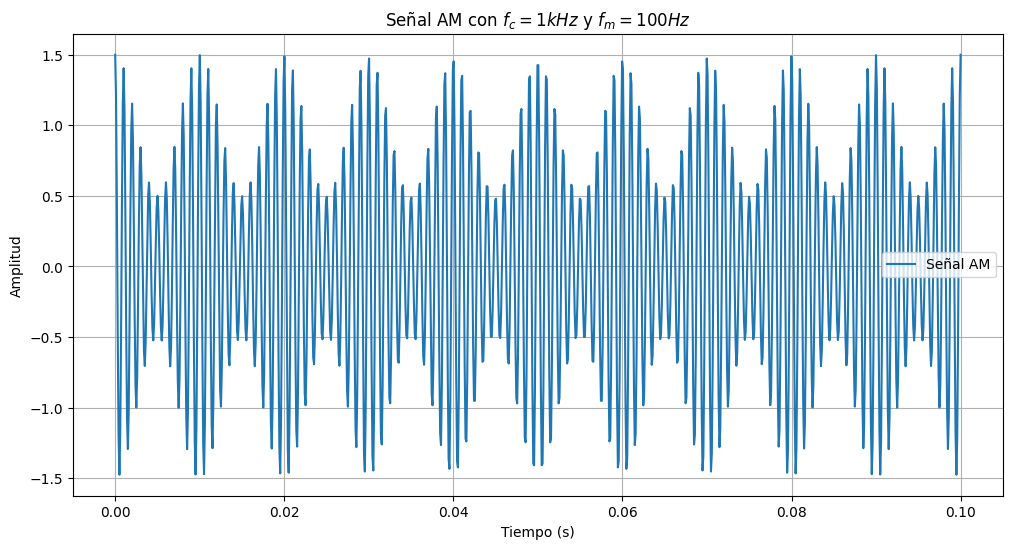

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fc = 1000  # Frecuencia de la portadora en Hz
fm = 100   # Frecuencia de la moduladora en Hz
Ac = 1.0   # Amplitud de la portadora
Am = 0.5   # Amplitud de la moduladora
t = np.linspace(0, 0.1, 1000)  # Vector de tiempo

# Señal moduladora
moduladora = Am * np.cos(2 * np.pi * fm * t)

# Señal AM
AM_signal = (Ac + moduladora) * np.cos(2 * np.pi * fc * t)

# Graficar la señal
plt.figure(figsize=(12, 6))
plt.plot(t, AM_signal, label='Señal AM')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal AM con $f_c=1kHz$ y $f_m=100Hz$')
plt.legend()
plt.grid(True)
plt.show()

Grafique la señal moduladora, la portadora y la señal modulada en el dominio del tiempo.

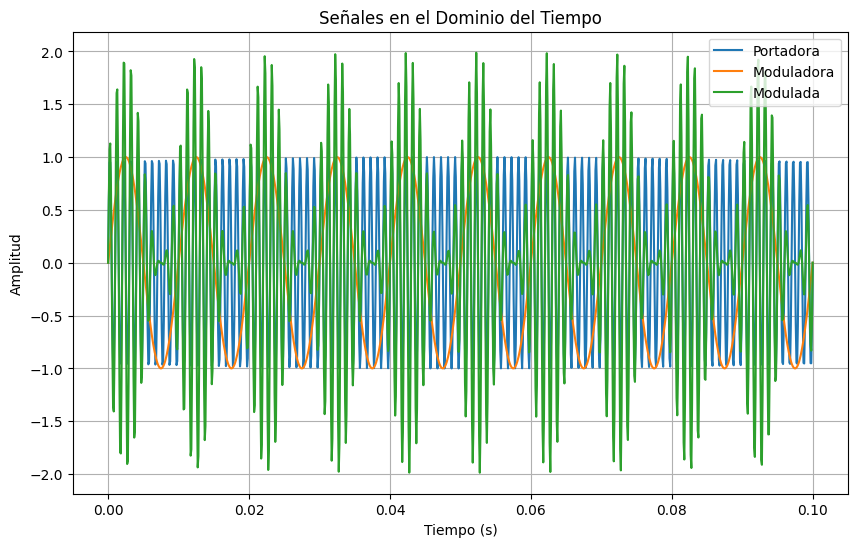

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
f_moduladora = 100   # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1   # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_modulada = (1 + moduladora) * portadora

# Graficar las señales
plt.figure(figsize=(10, 6))

plt.plot(tiempo, portadora, label='Portadora')
plt.plot(tiempo, moduladora, label='Moduladora')
plt.plot(tiempo, señal_modulada, label='Modulada')
plt.title('Señales en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.show()


Realice el análisis en el dominio de la frecuencia de la señal modulada.


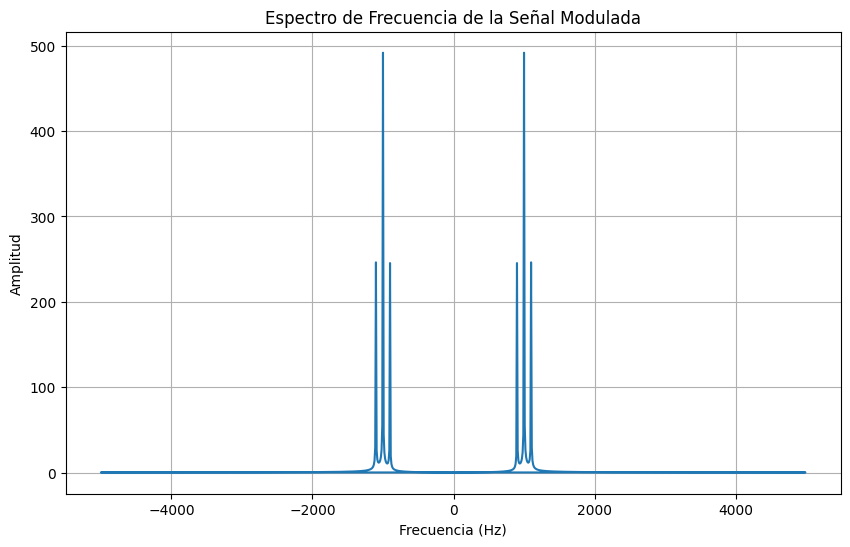

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
f_moduladora = 100   # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1   # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_modulada = (1 + moduladora) * portadora

# Calcular la transformada de Fourier de la señal modulada
fft_señal_modulada = np.fft.fft(señal_modulada)
frecuencias = np.fft.fftfreq(len(tiempo), 1 / muestras_por_segundo)

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 6))
plt.plot(frecuencias, np.abs(fft_señal_modulada))
plt.title('Espectro de Frecuencia de la Señal Modulada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


**Parte 2: DSB-SC**

Simule una señal DSB-SC con los mismos parámetros utilizados en la simulación de AM.

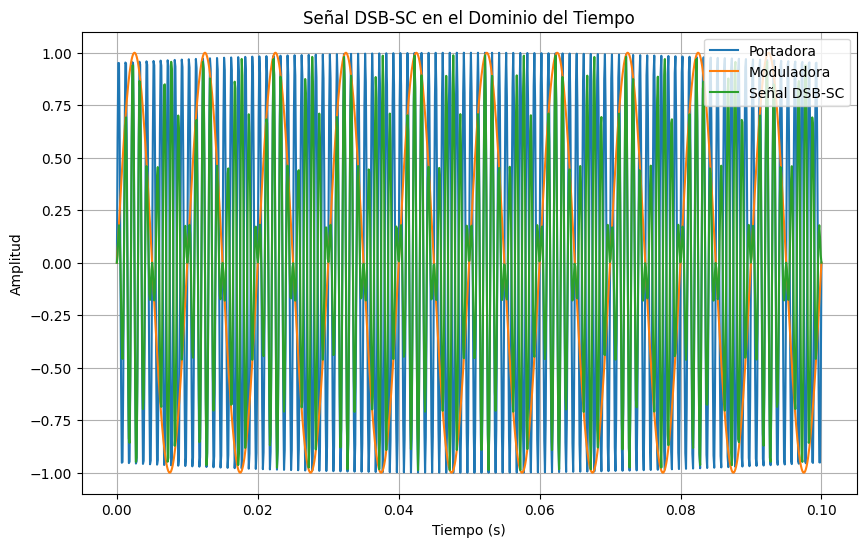

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
f_moduladora = 100   # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1   # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_modulada = moduladora * portadora

# Graficar las señales
plt.figure(figsize=(10, 6))

plt.plot(tiempo, portadora, label='Portadora')
plt.plot(tiempo, moduladora, label='Moduladora')
plt.plot(tiempo, señal_modulada, label='Señal DSB-SC')
plt.title('Señal DSB-SC en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.show()


Grafique las señales en el dominio del tiempo y frecuencia.


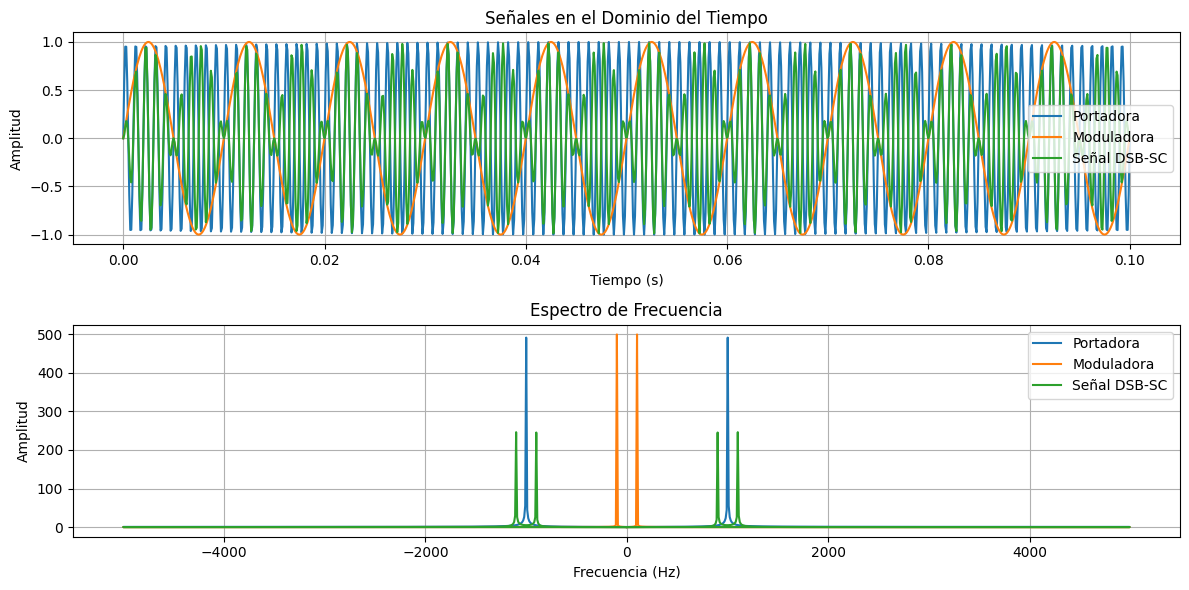

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
f_moduladora = 100   # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1   # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_modulada = moduladora * portadora

# Calcular la transformada de Fourier de las señales
fft_portadora = np.fft.fft(portadora)
fft_moduladora = np.fft.fft(moduladora)
fft_señal_modulada = np.fft.fft(señal_modulada)
frecuencias = np.fft.fftfreq(len(tiempo), 1 / muestras_por_segundo)

# Graficar las señales en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, portadora, label='Portadora')
plt.plot(tiempo, moduladora, label='Moduladora')
plt.plot(tiempo, señal_modulada, label='Señal DSB-SC')
plt.title('Señales en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

# Graficar el espectro de frecuencia
plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(fft_portadora), label='Portadora')
plt.plot(frecuencias, np.abs(fft_moduladora), label='Moduladora')
plt.plot(frecuencias, np.abs(fft_señal_modulada), label='Señal DSB-SC')
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Parte 3: SSB**

Simule una señal SSB con los mismos parámetros utilizados anteriormente.

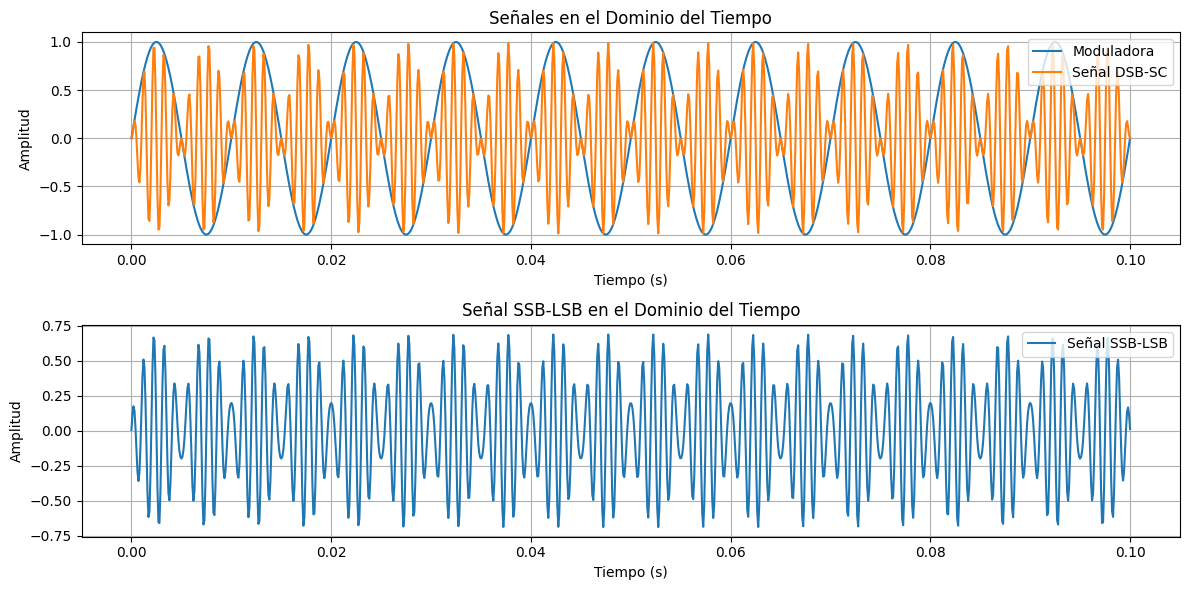

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
f_moduladora = 100   # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1   # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_modulada = moduladora * portadora

# Filtrar para obtener la banda inferior (LSB)
def butter_lowpass_filter(data, cutoff_freq, sample_rate, order=5):
    nyquist_freq = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

frec_corte = f_portadora + f_moduladora  # Frecuencia de corte para suprimir la banda superior
señal_LSB = butter_lowpass_filter(señal_modulada, frec_corte, muestras_por_segundo)

# Graficar las señales
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, moduladora, label='Moduladora')
plt.plot(tiempo, señal_modulada, label='Señal DSB-SC')
plt.title('Señales en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tiempo, señal_LSB, label='Señal SSB-LSB')
plt.title('Señal SSB-LSB en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Compare el espectro de la señal SSB con el de la señal AM y DSB-SC.

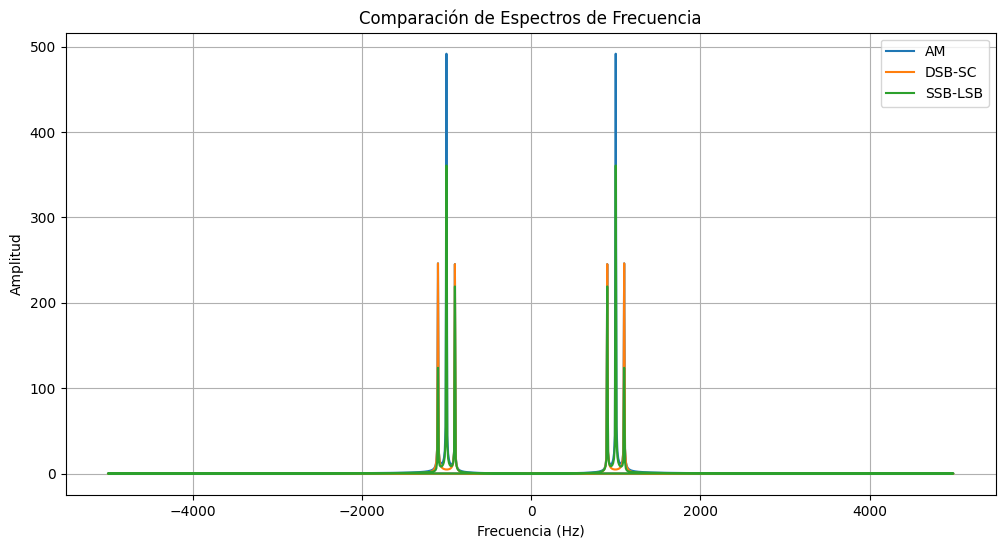

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
f_moduladora = 100   # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1   # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora_am = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora_am = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_modulada_am = (1 + moduladora_am) * portadora_am

portadora_dsb_sc = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora_dsb_sc = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_modulada_dsb_sc = moduladora_dsb_sc * portadora_dsb_sc

# Filtrar para obtener la banda inferior (SSB-LSB)
def butter_lowpass_filter(data, cutoff_freq, sample_rate, order=5):
    nyquist_freq = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

frec_corte = f_portadora + f_moduladora  # Frecuencia de corte para suprimir la banda superior
señal_lsb = butter_lowpass_filter(señal_modulada_am, frec_corte, muestras_por_segundo)

# Calcular la transformada de Fourier de las señales
fft_señal_am = np.fft.fft(señal_modulada_am)
fft_señal_dsb_sc = np.fft.fft(señal_modulada_dsb_sc)
fft_señal_lsb = np.fft.fft(señal_lsb)
frecuencias = np.fft.fftfreq(len(tiempo), 1 / muestras_por_segundo)

# Graficar los espectros de frecuencia
plt.figure(figsize=(12, 6))

plt.plot(frecuencias, np.abs(fft_señal_am), label='AM')
plt.plot(frecuencias, np.abs(fft_señal_dsb_sc), label='DSB-SC')
plt.plot(frecuencias, np.abs(fft_señal_lsb), label='SSB-LSB')
plt.title('Comparación de Espectros de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.show()


**Parte 4: FM**

Simule una señal FM con una frecuencia portadora de 1 kHz y una desviación de frecuencia de 50 Hz

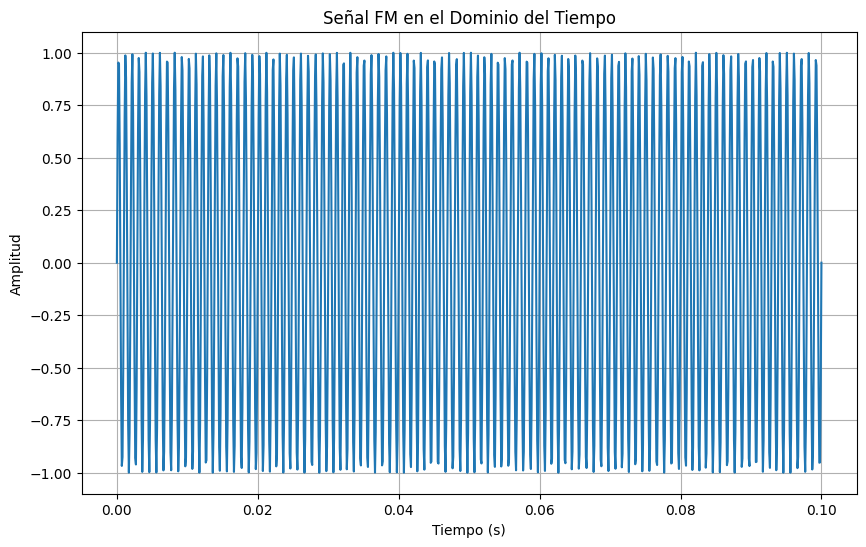

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
desviacion_frecuencia = 50  # Desviación de frecuencia en Hz
f_moduladora = 100  # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1  # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_fm = np.sin(2 * np.pi * f_portadora * tiempo + 2 * np.pi * desviacion_frecuencia * np.cumsum(moduladora) / muestras_por_segundo)

# Graficar la señal FM en el dominio del tiempo
plt.figure(figsize=(10, 6))
plt.plot(tiempo, señal_fm)
plt.title('Señal FM en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


Grafique las señales en el dominio del tiempo y frecuencia.


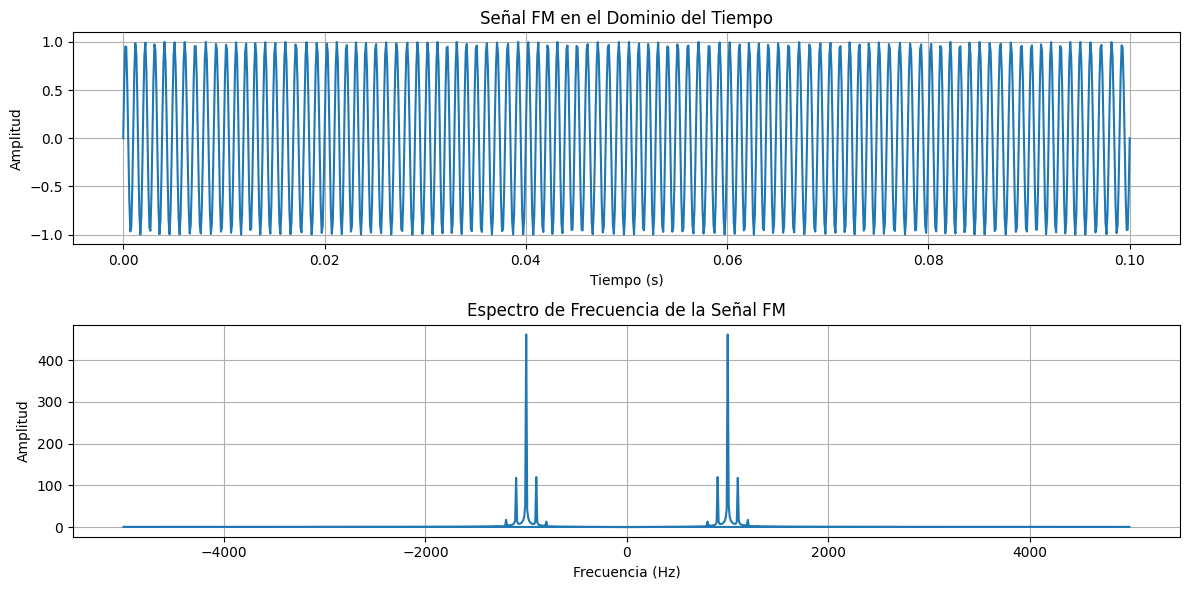

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
desviacion_frecuencia = 50  # Desviación de frecuencia en Hz
f_moduladora = 100  # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1  # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
señal_fm = np.sin(2 * np.pi * f_portadora * tiempo + 2 * np.pi * desviacion_frecuencia * np.cumsum(moduladora) / muestras_por_segundo)

# Calcular la transformada de Fourier de la señal FM
fft_señal_fm = np.fft.fft(señal_fm)
frecuencias = np.fft.fftfreq(len(tiempo), 1 / muestras_por_segundo)

# Graficar las señales en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, señal_fm)
plt.title('Señal FM en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar el espectro de frecuencia
plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(fft_señal_fm))
plt.title('Espectro de Frecuencia de la Señal FM')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


**Parte 5: PM**

Simule una señal PM con los mismos parámetros utilizados para FM

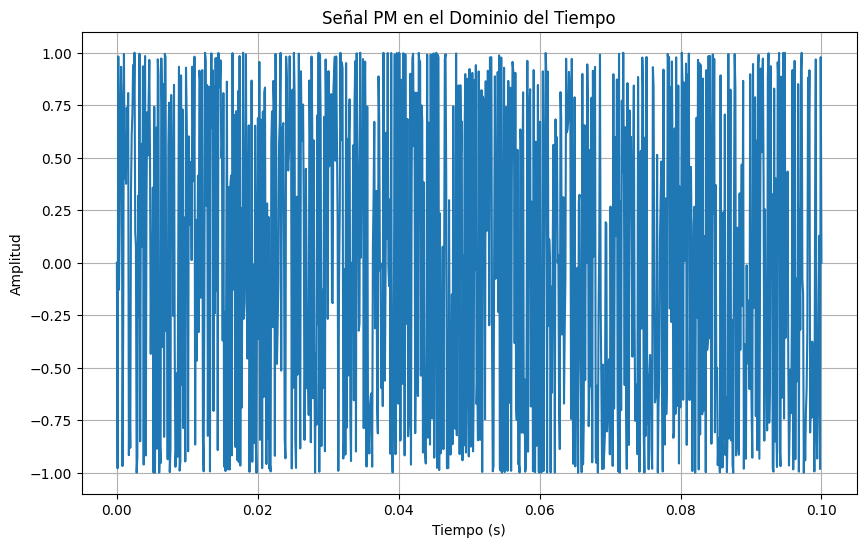

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
desviacion_fase = 50  # Desviación de fase en grados
f_moduladora = 100  # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1  # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
fase_modulada = np.arctan2(np.sin(2 * np.pi * f_moduladora * tiempo), np.cos(2 * np.pi * f_portadora * tiempo))
señal_pm = np.sin(2 * np.pi * f_portadora * tiempo + desviacion_fase * fase_modulada)

# Graficar la señal PM en el dominio del tiempo
plt.figure(figsize=(10, 6))
plt.plot(tiempo, señal_pm)
plt.title('Señal PM en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


Grafique las señales en el dominio del tiempo y frecuencia.


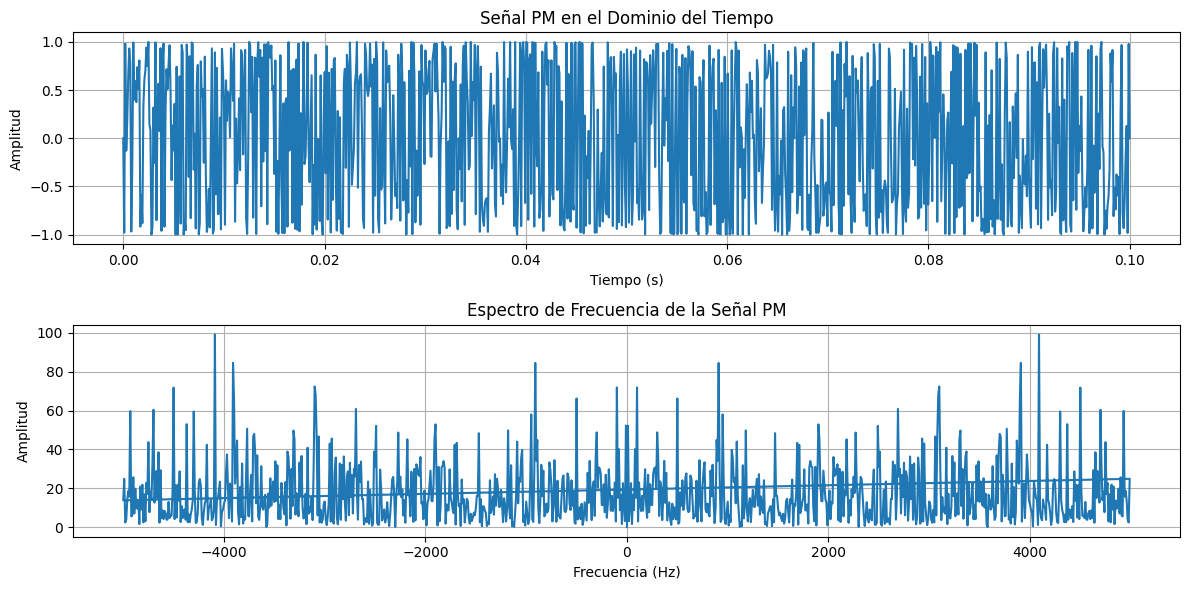

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
f_portadora = 1000  # Frecuencia de la portadora en Hz
desviacion_fase = 50  # Desviación de fase en grados
f_moduladora = 100  # Frecuencia de la señal moduladora en Hz
tiempo_total = 0.1  # Tiempo total en segundos
muestras_por_segundo = 10000  # Número de muestras por segundo
tiempo = np.linspace(0, tiempo_total, int(muestras_por_segundo * tiempo_total))

# Generar señales
portadora = np.sin(2 * np.pi * f_portadora * tiempo)
moduladora = np.sin(2 * np.pi * f_moduladora * tiempo)
fase_modulada = np.arctan2(np.sin(2 * np.pi * f_moduladora * tiempo), np.cos(2 * np.pi * f_portadora * tiempo))
señal_pm = np.sin(2 * np.pi * f_portadora * tiempo + desviacion_fase * fase_modulada)

# Calcular la transformada de Fourier de la señal PM
fft_señal_pm = np.fft.fft(señal_pm)
frecuencias = np.fft.fftfreq(len(tiempo), 1 / muestras_por_segundo)

# Graficar las señales en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, señal_pm)
plt.title('Señal PM en el Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Graficar el espectro de frecuencia
plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(fft_señal_pm))
plt.title('Espectro de Frecuencia de la Señal PM')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()
